In [1]:
# import sys
# !{sys.executable} -m pip install --upgrade matplotlib

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

sub_path = [
            "others/IMODE/IMODE_",
            "others/APGSK_IMODE/APGSK_IMODE_",
            "others/NL-SHADE-RSP/build/NL-SHADE-RSP_",
            "S-LSHADE-DP/S-LSHADE-DP_"
            ]
label = [
        "IMODE",
        "APGSK_IMODE",
        "NL-SHADE-RSP",
        "S-LSHADE-DP"]

dim = 10

print(sub_path)

['others/IMODE/IMODE_', 'others/APGSK_IMODE/APGSK_IMODE_', 'others/NL-SHADE-RSP/build/NL-SHADE-RSP_', 'S-LSHADE-DP/S-LSHADE-DP_']


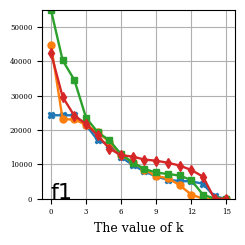

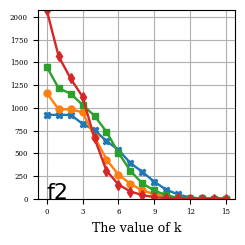

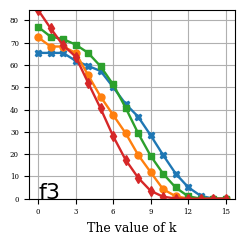

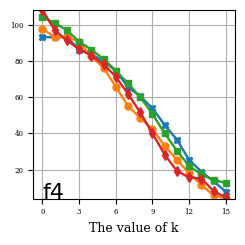

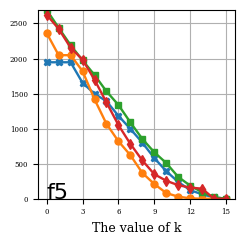

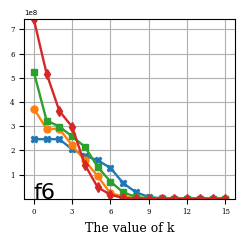

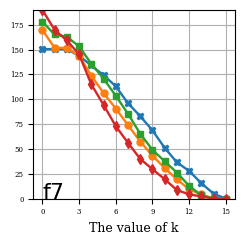

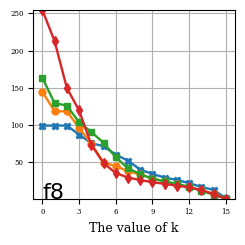

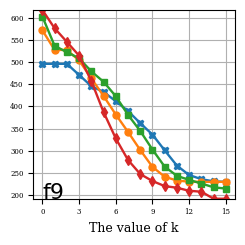

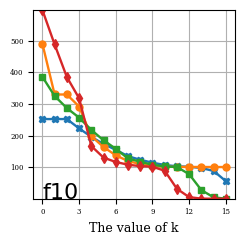

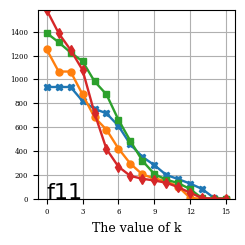

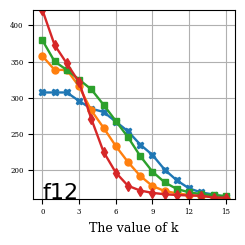

In [2]:
for i in range(1, 13):
    data = []
    for algo in sub_path:
        with open(algo + "{}_{}.txt".format(i, dim)) as f:
            arr = [[float (x) for x in line.split()] for line in f]
            mean = []
            for row in arr[0:-1]:
                for j in range(0, 30):
                    if row[j] <= 1e-8:
                        row[j] = 0
                mean.append(np.mean(row))
            data.append(mean)
            

#     print(data)
    
    matplotlib.rc('font', size=5)
    
    ax = plt.figure(num=1, figsize=(2.4, 2.4), dpi=100).gca()
    x_ticks = np.arange(0, 16, 1)
    ax.set_xticks(np.arange(0, 16, 3))
    plt.ylim(np.min(data)+5e-9, np.max(data))
    plt.grid()
    plt.xlabel("The value of k", fontsize=9, fontfamily = 'serif')
#     plt.ylabel("Error value", fontsize=9, fontfamily = 'serif')
    plt.xticks(fontsize=5,fontfamily = 'serif')
    plt.yticks(fontsize=5,fontfamily = 'serif')
    ms = [ 'X','o', 's','d','v','+', 'x', '^' ,'>','<']
    ls =['solid', 'solid']
    m=0
    l=0
#     plt.yscale('log')    
    for j in range(len(sub_path)):
        plt.plot(x_ticks, data[j], label=label[j], linestyle = ls[l%len(ls)], lw = 1.7, marker = ms[m], ms = 5)
        m = m+1
        l=l+1
#     plt.legend(bbox_to_anchor=(0, 0), loc='lower left', borderaxespad=0.1, fontsize = 5)

    ax.text(0, np.min(data)+1e-8, "f{}".format(i), fontsize = 16)
    plt.tight_layout()
#     plt.savefig("convergence/f{}_D{}.pdf".format(i, dim))
    plt.show()
    plt.close()
    